In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn import metrics

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold


In [30]:
dataset = pd.read_csv("BTC-USD.csv")
print(dataset.shape)
dataset.head()

(2713, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [31]:
dataset.shape

(2713, 7)

In [32]:
dataset["Date"] = pd.to_datetime(dataset['Date'])
dataset['Date']

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2708   2022-02-15
2709   2022-02-16
2710   2022-02-17
2711   2022-02-18
2712   2022-02-19
Name: Date, Length: 2713, dtype: datetime64[ns]

In [33]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [34]:
dataset["Close"].shape

(2713,)

In [35]:
dataset['pos_neg'] = dataset['Open'] - dataset['Close']
dataset.head()
#if Open > Close then 0,else 1
dataset['Up/Down'] = np.where(dataset['pos_neg'] > 0, '0', '1')

In [36]:
dataset['Up/Down'].unique()

array(['0', '1'], dtype=object)

In [37]:
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
pos_neg      0
Up/Down      0
dtype: int64

In [38]:
(dataset['Open'] < 0).sum()

0

In [39]:
(dataset['Close'] < 0).sum()

0

In [40]:
(dataset['High'] < 0).sum()

0

In [41]:
(dataset['Low'] < 0).sum()

0

In [42]:
(dataset['Volume'] < 0).sum()

0

In [43]:
model = sm.formula.ols(formula="Close ~ High + Low + Open", data=dataset)
multi_reg = model.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.223e+06
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:17:51   Log-Likelihood:                -19537.
No. Observations:                2713   AIC:                         3.908e+04
Df Residuals:                    2709   BIC:                         3.911e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9457      7.623      0.386      0.6

Text(0, 0.5, 'Daily Bitcoin price')

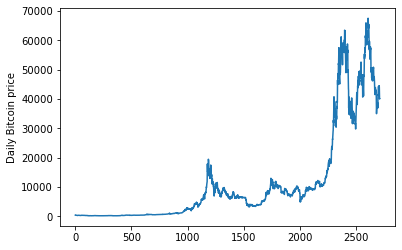

In [44]:
dataset['Close'].plot()
plt.ylabel("Daily Bitcoin price")

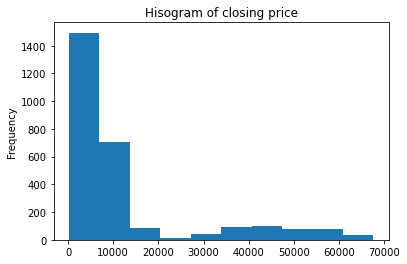

In [45]:
dataset['Close'].plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

<AxesSubplot:xlabel='Date'>

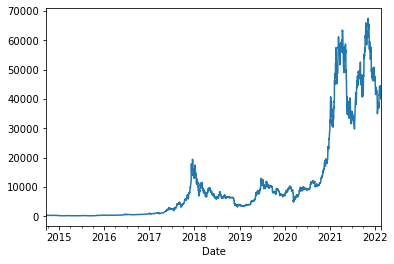

In [47]:
by_year = dataset['Close'].groupby(dataset['Date']).mean()
by_year.plot()

Text(0.5, 1.0, 'Volume trend')

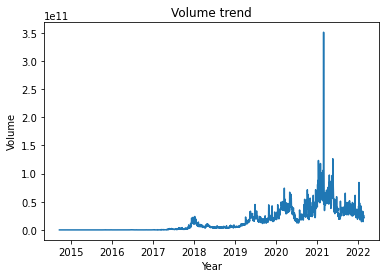

In [48]:
plt.plot('Date', 'Volume', data=dataset)
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume trend')

Text(0.5, 1.0, 'graph')

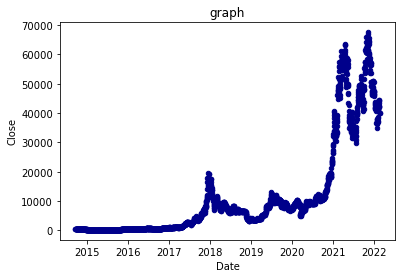

In [76]:
ax1 = dataset.plot.scatter(x='Date', y='Close', c='DarkBlue')
plt.title('graph')

In [55]:
scaled_data = dataset[['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = MinMaxScaler(copy=False)
scaled_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(scaled_data[['Open', 'High', 'Low', 'Close', 'Volume']])
scaled_data

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Open,High,Low,Close,Volume
0,0.004289,0.003739,0.004243,0.004144,0.000043
1,0.004155,0.003574,0.003649,0.003655,0.000081
2,0.003669,0.003151,0.003217,0.003216,0.000091
3,0.003232,0.003085,0.003298,0.003425,0.000088
4,0.003431,0.002927,0.003348,0.003275,0.000059
...,...,...,...,...,...
2708,0.629476,0.648248,0.639166,0.658821,0.064724
2709,0.659040,0.646951,0.653750,0.649719,0.056378
2710,0.649522,0.640458,0.605309,0.598912,0.074768
2711,0.599281,0.593740,0.596070,0.591388,0.066401


In [59]:

X = scaled_data[['Open', 'High', 'Low', 'Volume']]
y = scaled_data['Close']

In [60]:
X = scaled_data[['Open', 'High', 'Low', 'Close','Volume']]
y = dataset["Up/Down"].values

In [61]:

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2034, 5)
(2034,)
(679, 5)
(679,)


In [63]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, scoring='roc_auc', cv=cv, n_jobs=1)
scores

array([0.53976624, 0.58595336, 0.63526738, 0.59131264, 0.69197832])

In [64]:
predicted = cross_val_predict(lr, X, y, cv=6)
scores = cross_val_score(lr, X, y, scoring='roc_auc', cv=36, n_jobs=1)
scores


array([0.99303136, 0.99233449, 0.9902439 , 0.93519164, 0.99860627,
       0.58815331, 0.91986063, 0.89268293, 0.7902439 , 0.97073171,
       0.71916376, 0.91080139, 0.95052265, 0.99714286, 0.995     ,
       1.        , 0.76071429, 0.86714286, 0.87428571, 0.89785714,
       0.61714286, 0.98928571, 1.        , 0.69928571, 0.91142857,
       0.97417504, 0.8472023 , 0.37876614, 0.93615495, 0.88091822,
       1.        , 0.98350072, 0.61621234, 0.99856528, 0.98350072,
       0.91032999])

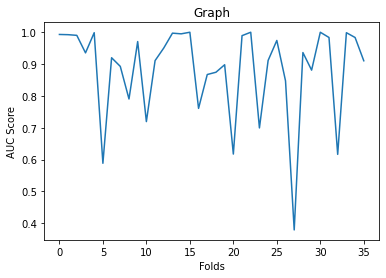

In [75]:
fig,ax = plt.subplots()
plt.plot(scores)
ax.set_xlabel('Folds')
ax.set_ylabel('AUC Score')
plt.title('Graph')
plt.show()

In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred_log = lr.predict(X_test)
dfp = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred_log})
dfp.head()

,Actual_Price,Predicted_Price
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1


In [68]:
y_pred_log = lr.predict(X_test)
y_pred_log_probs = lr.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_log)
test_auc_roc = roc_auc_score(y_test, y_pred_log_probs)

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_log))

print('Testing AUC: ', test_auc_roc)

print('Testing accuracy: ', test_accuracy)


Confusion matrix:
 [[ 32 276]
 [  5 366]]
Testing AUC:  0.5976563867399447
Testing accuracy:  0.5861561119293078


In [69]:
score = metrics.roc_auc_score(y_test, lr.predict(X_test))
error = metrics.log_loss(y_test, lr.predict(X_test))
print('ROC AUC Score: ', score)
print('Loss: ', error)

ROC AUC Score:  0.5452095074736585
Loss:  14.293986532931715


In [70]:
print(classification_report(y_test, y_pred_log, digits=2))

              precision    recall  f1-score   support

           0       0.86      0.10      0.19       308
           1       0.57      0.99      0.72       371

    accuracy                           0.59       679
   macro avg       0.72      0.55      0.45       679
weighted avg       0.70      0.59      0.48       679

